In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
df=pd.read_csv(r"C:\Users\varungo\Desktop\housing_train.csv")

In [236]:
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [237]:
df.shape

(265190, 22)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

In [239]:
df.isnull().sum()

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
image_url                      0
description                    2
lat                         1419
long                        1419
state                          1
dtype: int64

In [240]:
df["laundry_options"].unique()

array(['laundry on site', 'w/d hookups', 'w/d in unit', nan,
       'laundry in bldg', 'no laundry on site'], dtype=object)

In [241]:
df["parking_options"].unique()

array(['street parking', 'off-street parking', nan, 'carport',
       'attached garage', 'detached garage', 'no parking',
       'valet parking'], dtype=object)

In [242]:
print(df["lat"].unique())
print(len(df["lat"].unique()))

[33.4226 33.3755 33.0969 ... 36.1287 39.8408 40.0451]
41960


In [243]:
print(df["long"].unique())
print(len(df["long"].unique()))

[-86.7065 -86.8045 -86.7601 ... -82.9921 -82.975  -82.4564]
39340


In [244]:
df["laundry_options"]=df["laundry_options"].fillna(df["laundry_options"].mode()[0])

In [245]:
df["parking_options"]=df["parking_options"].fillna(df["parking_options"].mode()[0])

In [246]:
df["lat"]=df["lat"].fillna(df["lat"].mean())

In [247]:
df["long"]=df["long"].fillna(df["long"].mean())

In [248]:
df.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                2
lat                        0
long                       0
state                      1
dtype: int64

In [249]:
df.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

In [250]:
len(df["description"].unique())

195472

In [251]:
df.loc[0,"description"]

'Apartments In Birmingham AL Welcome to 100 Inverness Apartment Homes, a luxury apartment community tucked away into one of the most coveted locations in the city for Birmingham apartments. Find stylish one-, two-, and three-bedroom apartment floor plans tailored to your wants and needs, complete with the amenities that are important to you. Our layouts come with just enough variety to enable you to make it your own haven unlike any other. Get inspired by our photos and the serenity of the nature surrounding you to let your aesthetic come together with our stylish, modern designs for a home you wonâ\x80\x99t be able to wait to show off to your guests. Even beyond style, our pet-friendly apartment community is also all about functionality! Some of our homes come with washer and dryer hookups, wood burning fireplaces, hardwood floors, and a private patio or balcony. All of our residents can make use of oversized walk-in closets, air conditioning, garages, a business center, on-site manag

In [252]:
df[df["description"].isnull()== True]

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
115045,7038994780,https://savannah.craigslist.org/apa/d/pooler-p...,savannah / hinesville,https://savannah.craigslist.org,905,apartment,1132,2,2.0,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00m0m_9wTPUMJWyt...,NaN,32.1149,-81.2520,ga
247410,7040721424,https://hudsonvalley.craigslist.org/apa/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,1600,apartment,950,2,1.0,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00j0j_cdesyqAgYg...,NaN,41.7035,-73.9117,ny


In [253]:
df.loc[115045,"region"]

'savannah / hinesville'

In [254]:
len(df["url"].unique())

265190

In [255]:
len(df["region"].unique())

298

In [256]:
len(df["region_url"].unique())

305

In [257]:
df[df["region"]== 'savannah / hinesville']

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
111964,7045071427,https://savannah.craigslist.org/apa/d/pooler-b...,savannah / hinesville,https://savannah.craigslist.org,925,apartment,792,1,1.0,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00j0j_4jW5ivdxtn...,Our Floor Plans The Carlyle at Godley Station ...,32.1149,-81.2520,ga
112051,7046853009,https://savannah.craigslist.org/apa/d/pooler-d...,savannah / hinesville,https://savannah.craigslist.org,1005,apartment,1132,2,2.0,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00e0e_bcvH63UD4V...,Our Floor Plans The Carlyle at Godley Station ...,32.1149,-81.2520,ga
112179,7045073317,https://savannah.craigslist.org/apa/d/savannah...,savannah / hinesville,https://savannah.craigslist.org,911,apartment,553,0,1.0,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00Z0Z_lOBwI781ju...,Parkside at the Highlands is a modern apartmen...,32.1491,-81.1632,ga
112258,7045069258,https://savannah.craigslist.org/apa/d/pooler-d...,savannah / hinesville,https://savannah.craigslist.org,1005,apartment,1132,2,2.0,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00101_agBmDEka9X...,Our Floor Plans The Carlyle at Godley Station ...,32.1149,-81.2520,ga
112267,7044810695,https://savannah.craigslist.org/apa/d/savannah...,savannah / hinesville,https://savannah.craigslist.org,1349,apartment,1430,4,3.0,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00i0i_lnBU4W7O5k...,"At Bradley Pointe, take advantage of included ...",31.9846,-81.2662,ga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116209,7030738922,https://savannah.craigslist.org/apa/d/savannah...,savannah / hinesville,https://savannah.craigslist.org,999,apartment,1080,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00p0p_kSqSBGN6Nt...,New Redesigned w/Stainless Steel Appliances an...,31.9992,-81.1036,ga
116211,7030738898,https://savannah.craigslist.org/apa/d/savannah...,savannah / hinesville,https://savannah.craigslist.org,999,apartment,1080,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01717_b7lT70j5gx...,New Redesigned w/Stainless Steel Appliances an...,31.9992,-81.1036,ga
116212,7030738861,https://savannah.craigslist.org/apa/d/savannah...,savannah / hinesville,https://savannah.craigslist.org,999,apartment,1080,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_eErp5Y1UJr...,New Redesigned w/Stainless Steel Appliances an...,31.9992,-81.1036,ga
116213,7029541985,https://savannah.craigslist.org/apa/d/pooler-n...,savannah / hinesville,https://savannah.craigslist.org,765,apartment,658,1,1.0,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/01515_lwU1n2wPmR...,The Carlyle at Godley Station Luxry Apartments...,32.1149,-81.2520,ga


In [258]:
sr1=df.loc[111964,"description"]

In [259]:
str1

"Our Floor Plans The Carlyle at Godley Station provides highly sought after one, two, and threeÂ\xa0bedroom apartments in Pooler. These spacious floor plans are beautifully laid out, and can accommodate a variety of living situations. The Carlyle at Godley Station's one bedroom, one bathroom apartment home ranges from 658 square feet to 792 square feet. Residents with these homes are sure to enjoy the newly renovated interiors and countlessÂ\xa0community amenitiesÂ\xa0that come standard at The Carlyle at Godley Station. The two bedroom, two bathroom apartment homes provide residents with a little more space. These apartment homes range in size from 924 square feet to 1254 square feet, and are large enough to accommodate roommates, or residents that have extra storage needs. Our Alexandra floor plan even has a sunroom; a unique feature rarely found at apartment communities. Lastly, our largest apartment home is a three bedroom, two bathroom model that comes in at an expansive 1413 squar

In [260]:
df.loc[247410,"region"]

'hudson valley'

In [261]:
df[df["region"]== 'hudson valley']

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
228176,7049729805,https://hudsonvalley.craigslist.org/apa/d/midd...,hudson valley,https://hudsonvalley.craigslist.org,1800,condo,1500,4,2.0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00l0l_3BjdSMYhpo...,3-4 bedroom 2 baths Located in a quiet Middle...,41.4463,-74.4108,ny
229316,7047847070,https://hudsonvalley.craigslist.org/apa/d/high...,hudson valley,https://hudsonvalley.craigslist.org,850,cottage/cabin,780,2,1.0,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00g0g_ffzRqx1inh...,2bedrm cottage on large yard front and back ni...,41.7837,-74.2046,ny
232600,7039667322,https://hudsonvalley.craigslist.org/apa/d/wurt...,hudson valley,https://hudsonvalley.craigslist.org,1200,house,1200,3,1.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00O0O_62Xnio4kJW...,For rent is a 3 large bedrooms house with self...,41.5904,-74.5005,ny
232850,7028651407,https://hudsonvalley.craigslist.org/apa/d/howe...,hudson valley,https://hudsonvalley.craigslist.org,1800,apartment,1720,3,1.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/01010_55iHfoAO4D...,Newly renovated 3BR 1BA single family home loc...,41.4542,-74.4072,ny
234704,7039537874,https://hudsonvalley.craigslist.org/apa/d/chel...,hudson valley,https://hudsonvalley.craigslist.org,1845,apartment,939,2,2.0,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00H0H_8cYeoI760E...,"Don't miss out, this apartment definitely won'...",41.5672,-73.9935,ny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247746,7006673731,https://hudsonvalley.craigslist.org/apa/d/tall...,hudson valley,https://hudsonvalley.craigslist.org,2640,apartment,982,2,2.0,1,...,1,0,0,w/d in unit,detached garage,https://images.craigslist.org/00K0K_4PJoAvj8vF...,"Receive $1,000+ off your 1st month Rent!Â Cal...",41.1177,-74.1241,ny
247747,7005358722,https://hudsonvalley.craigslist.org/apa/d/tall...,hudson valley,https://hudsonvalley.craigslist.org,2640,apartment,982,2,2.0,1,...,1,0,0,w/d in unit,detached garage,https://images.craigslist.org/00r0r_5WihumtpqE...,"Receive $1,000+ off your 1st month Rent!Â Cal...",41.1177,-74.1241,ny
247749,7024912723,https://hudsonvalley.craigslist.org/apa/d/wapp...,hudson valley,https://hudsonvalley.craigslist.org,1063,apartment,584,1,1.0,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00202_b6FYD1sSbJ...,COME JOIN OUR ONE BEDROOM WAIT LIST!!! Lex. C...,41.6241,-73.9130,ny
247750,7024896687,https://hudsonvalley.craigslist.org/apa/d/corn...,hudson valley,https://hudsonvalley.craigslist.org,2050,house,1212,3,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00303_g3wKqdVcoZ...,"This renovated 3 bedroom, 2 bath home features...",41.4162,-74.0395,ny


In [262]:
str2=df.loc[228176,"description"]

In [263]:
str2

'3-4 bedroom 2 baths  Located in a quiet Middletown neighborhood  Conveniently located   Call Giuseppe  show contact info'

In [264]:
df.loc[247410,"description"]=str2

In [265]:
df.loc[247410,"description"]

'3-4 bedroom 2 baths  Located in a quiet Middletown neighborhood  Conveniently located   Call Giuseppe  show contact info'

In [266]:
df.loc[115045,"description"]

nan

In [267]:
df.loc[115045,"description"]=str1

In [268]:
df.loc[115045,"description"]

"Our Floor Plans The Carlyle at Godley Station provides highly sought after one, two, and threeÂ\xa0bedroom apartments in Pooler. These spacious floor plans are beautifully laid out, and can accommodate a variety of living situations. The Carlyle at Godley Station's one bedroom, one bathroom apartment home ranges from 658 square feet to 792 square feet. Residents with these homes are sure to enjoy the newly renovated interiors and countlessÂ\xa0community amenitiesÂ\xa0that come standard at The Carlyle at Godley Station. The two bedroom, two bathroom apartment homes provide residents with a little more space. These apartment homes range in size from 924 square feet to 1254 square feet, and are large enough to accommodate roommates, or residents that have extra storage needs. Our Alexandra floor plan even has a sunroom; a unique feature rarely found at apartment communities. Lastly, our largest apartment home is a three bedroom, two bathroom model that comes in at an expansive 1413 squar

In [269]:
df.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      1
dtype: int64

In [270]:
df["state"].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'mi', 'md',
       'ma', 'mn', 'ms', 'nc', 'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'oh', 'nd', 'ok', 'or', nan], dtype=object)

In [271]:
df[df["state"].isnull() == True].region

265189    columbus
Name: region, dtype: object

In [272]:
temp=df[df["region"] == "columbus"].state

In [273]:
temp

109838     ga
109882     ga
109925     ga
109926     ga
109927     ga
         ... 
265185     oh
265186     oh
265187     oh
265188     oh
265189    NaN
Name: state, Length: 2055, dtype: object

In [274]:
temp.describe()

count     2054
unique       2
top         ga
freq      1589
Name: state, dtype: object

In [275]:
df["state"].fillna("ga",inplace=True)

In [276]:
df.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64

In [277]:
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [278]:
df1=df.copy()

In [279]:
df1.drop(["id",'url',"region_url"],axis=1,inplace=True)

In [280]:
df1.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,birmingham,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,birmingham,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,birmingham,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [281]:
len(df1["region"].unique())

298

In [282]:
len(df1["type"].unique())

12

In [283]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df1['region']= label_encoder.fit_transform(df1['region']) 
  
df1['region'].unique()

array([ 21, 116,  62, 166, 171,  84,  93, 274,   5,  77, 204,  82, 272,
       149, 209, 296,  80,  13, 266,  91, 103, 114, 119, 151, 131, 242,
       168,  88, 125, 231,  96, 233,  45, 117,  28, 167, 194, 161, 162,
       199, 215, 170, 214, 220, 223, 224, 225,   0, 260, 281, 261,  50,
       295, 282, 235, 227,  59, 185,  86, 290,  68, 104, 175, 283, 110,
       210,  56,  92,  94, 123, 189,  67, 107,  58, 139,  85, 178, 196,
       200, 202, 228, 238, 190, 250, 263, 264,  11,  12,  32,  10, 271,
         2, 253, 153,  52, 186, 229, 106,  25,  65, 258, 251, 280,  24,
        41,  44, 276,  57, 134, 212, 257, 203,  76, 252,  23, 145, 211,
       118,  89, 218, 236,   4, 216, 244, 159, 172, 286, 136, 133, 265,
        37,  60, 192, 291,  87, 143, 222, 234,  29, 146,  70, 120, 152,
        63,  15, 284, 155, 287, 270, 135, 169, 158, 176, 130, 240, 137,
       241, 115, 187, 246, 232,  39, 112, 198, 154, 140,   7,  14,  90,
       245,  27, 237, 289, 294, 288,   6,  16,  61, 111,  54,  8

In [284]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df1['type']= label_encoder.fit_transform(df1['type']) 
  
df1['type'].unique()

array([ 0,  6, 10, 11,  2,  4,  5,  3,  7,  9,  8,  1])

In [285]:
len(df1["laundry_options"].unique())

5

In [286]:
df1["laundry_options"].unique()

array(['laundry on site', 'w/d hookups', 'w/d in unit', 'laundry in bldg',
       'no laundry on site'], dtype=object)

In [287]:
df1["laundry_options"]=df1["laundry_options"].map({'laundry on site':1,'w/d hookups':2,'w/d in unit':3,'laundry in bldg':4,'no laundry on site':5})

In [288]:
(df1["parking_options"].unique())

array(['street parking', 'off-street parking', 'carport',
       'attached garage', 'detached garage', 'no parking',
       'valet parking'], dtype=object)

In [289]:
df1["parking_options"]=df1["parking_options"].map({'street parking':1,'off-street parking':2,'carport':3,'attached garage':4,'detached garage':5,'no parking':6,'valet parking':7})

In [290]:
df1.drop(["image_url","description"],axis=1,inplace=True)

In [291]:
len(df1["state"].unique())

38

In [292]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df1['state']= label_encoder.fit_transform(df1['state']) 
  
len(df1['state'].unique())

38

In [293]:
df1.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,21,1195,0,1908,3,2.0,1,1,1,0,0,0,1,1,33.4226,-86.7065,1
1,21,1120,0,1319,3,2.0,1,1,1,0,0,0,1,2,33.3755,-86.8045,1
2,21,825,0,1133,1,1.5,1,1,1,0,0,0,1,1,33.4226,-86.7065,1
3,21,800,0,927,1,1.0,1,1,1,0,0,0,1,1,33.4226,-86.7065,1
4,21,785,0,1047,2,1.0,1,1,1,0,0,0,1,1,33.4226,-86.7065,1


In [307]:
df1.dtypes

region                       int32
price                        int64
type                         int32
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options              int64
parking_options              int64
lat                        float64
long                       float64
state                        int32
dtype: object

In [323]:
X=df1.drop("price",axis=1)

In [324]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [330]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [328]:
X.drop(['cats_allowed'],axis=1,inplace=True)

In [333]:
X.head()

,region,type,sqfeet,beds,baths,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,long,state
0,21,0,1908,3,2.0,1,1,0,0,0,1,1,-86.7065,1
1,21,0,1319,3,2.0,1,1,0,0,0,1,2,-86.8045,1
2,21,0,1133,1,1.5,1,1,0,0,0,1,1,-86.7065,1
3,21,0,927,1,1.0,1,1,0,0,0,1,1,-86.7065,1
4,21,0,1047,2,1.0,1,1,0,0,0,1,1,-86.7065,1


In [335]:
Y=df["price"]

In [336]:
X

,region,type,sqfeet,beds,baths,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,long,state
0,21,0,1908,3,2.0,1,1,0,0,0,1,1,-86.706500,1
1,21,0,1319,3,2.0,1,1,0,0,0,1,2,-86.804500,1
2,21,0,1133,1,1.5,1,1,0,0,0,1,1,-86.706500,1
3,21,0,927,1,1.0,1,1,0,0,0,1,1,-86.706500,1
4,21,0,1047,2,1.0,1,1,0,0,0,1,1,-86.706500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,52,0,1061,2,2.0,1,1,0,0,0,3,5,-83.066900,35
265186,52,0,1020,2,1.5,1,1,0,0,0,2,5,-83.080400,35
265187,52,0,1660,2,1.5,1,1,0,0,0,3,2,-83.041700,35
265188,52,0,1220,3,1.5,1,1,0,0,0,2,2,-82.456400,35


In [337]:
Y

0         1195
1         1120
2          825
3          800
4          785
          ... 
265185       0
265186    1069
265187    1507
265188    1001
265189    1164
Name: price, Length: 265190, dtype: int64

In [339]:
df2=X

In [340]:
df2["price"]=Y

In [341]:
df2.head()

,region,type,sqfeet,beds,baths,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,long,state,price
0,21,0,1908,3,2.0,1,1,0,0,0,1,1,-86.7065,1,1195
1,21,0,1319,3,2.0,1,1,0,0,0,1,2,-86.8045,1,1120
2,21,0,1133,1,1.5,1,1,0,0,0,1,1,-86.7065,1,825
3,21,0,927,1,1.0,1,1,0,0,0,1,1,-86.7065,1,800
4,21,0,1047,2,1.0,1,1,0,0,0,1,1,-86.7065,1,785


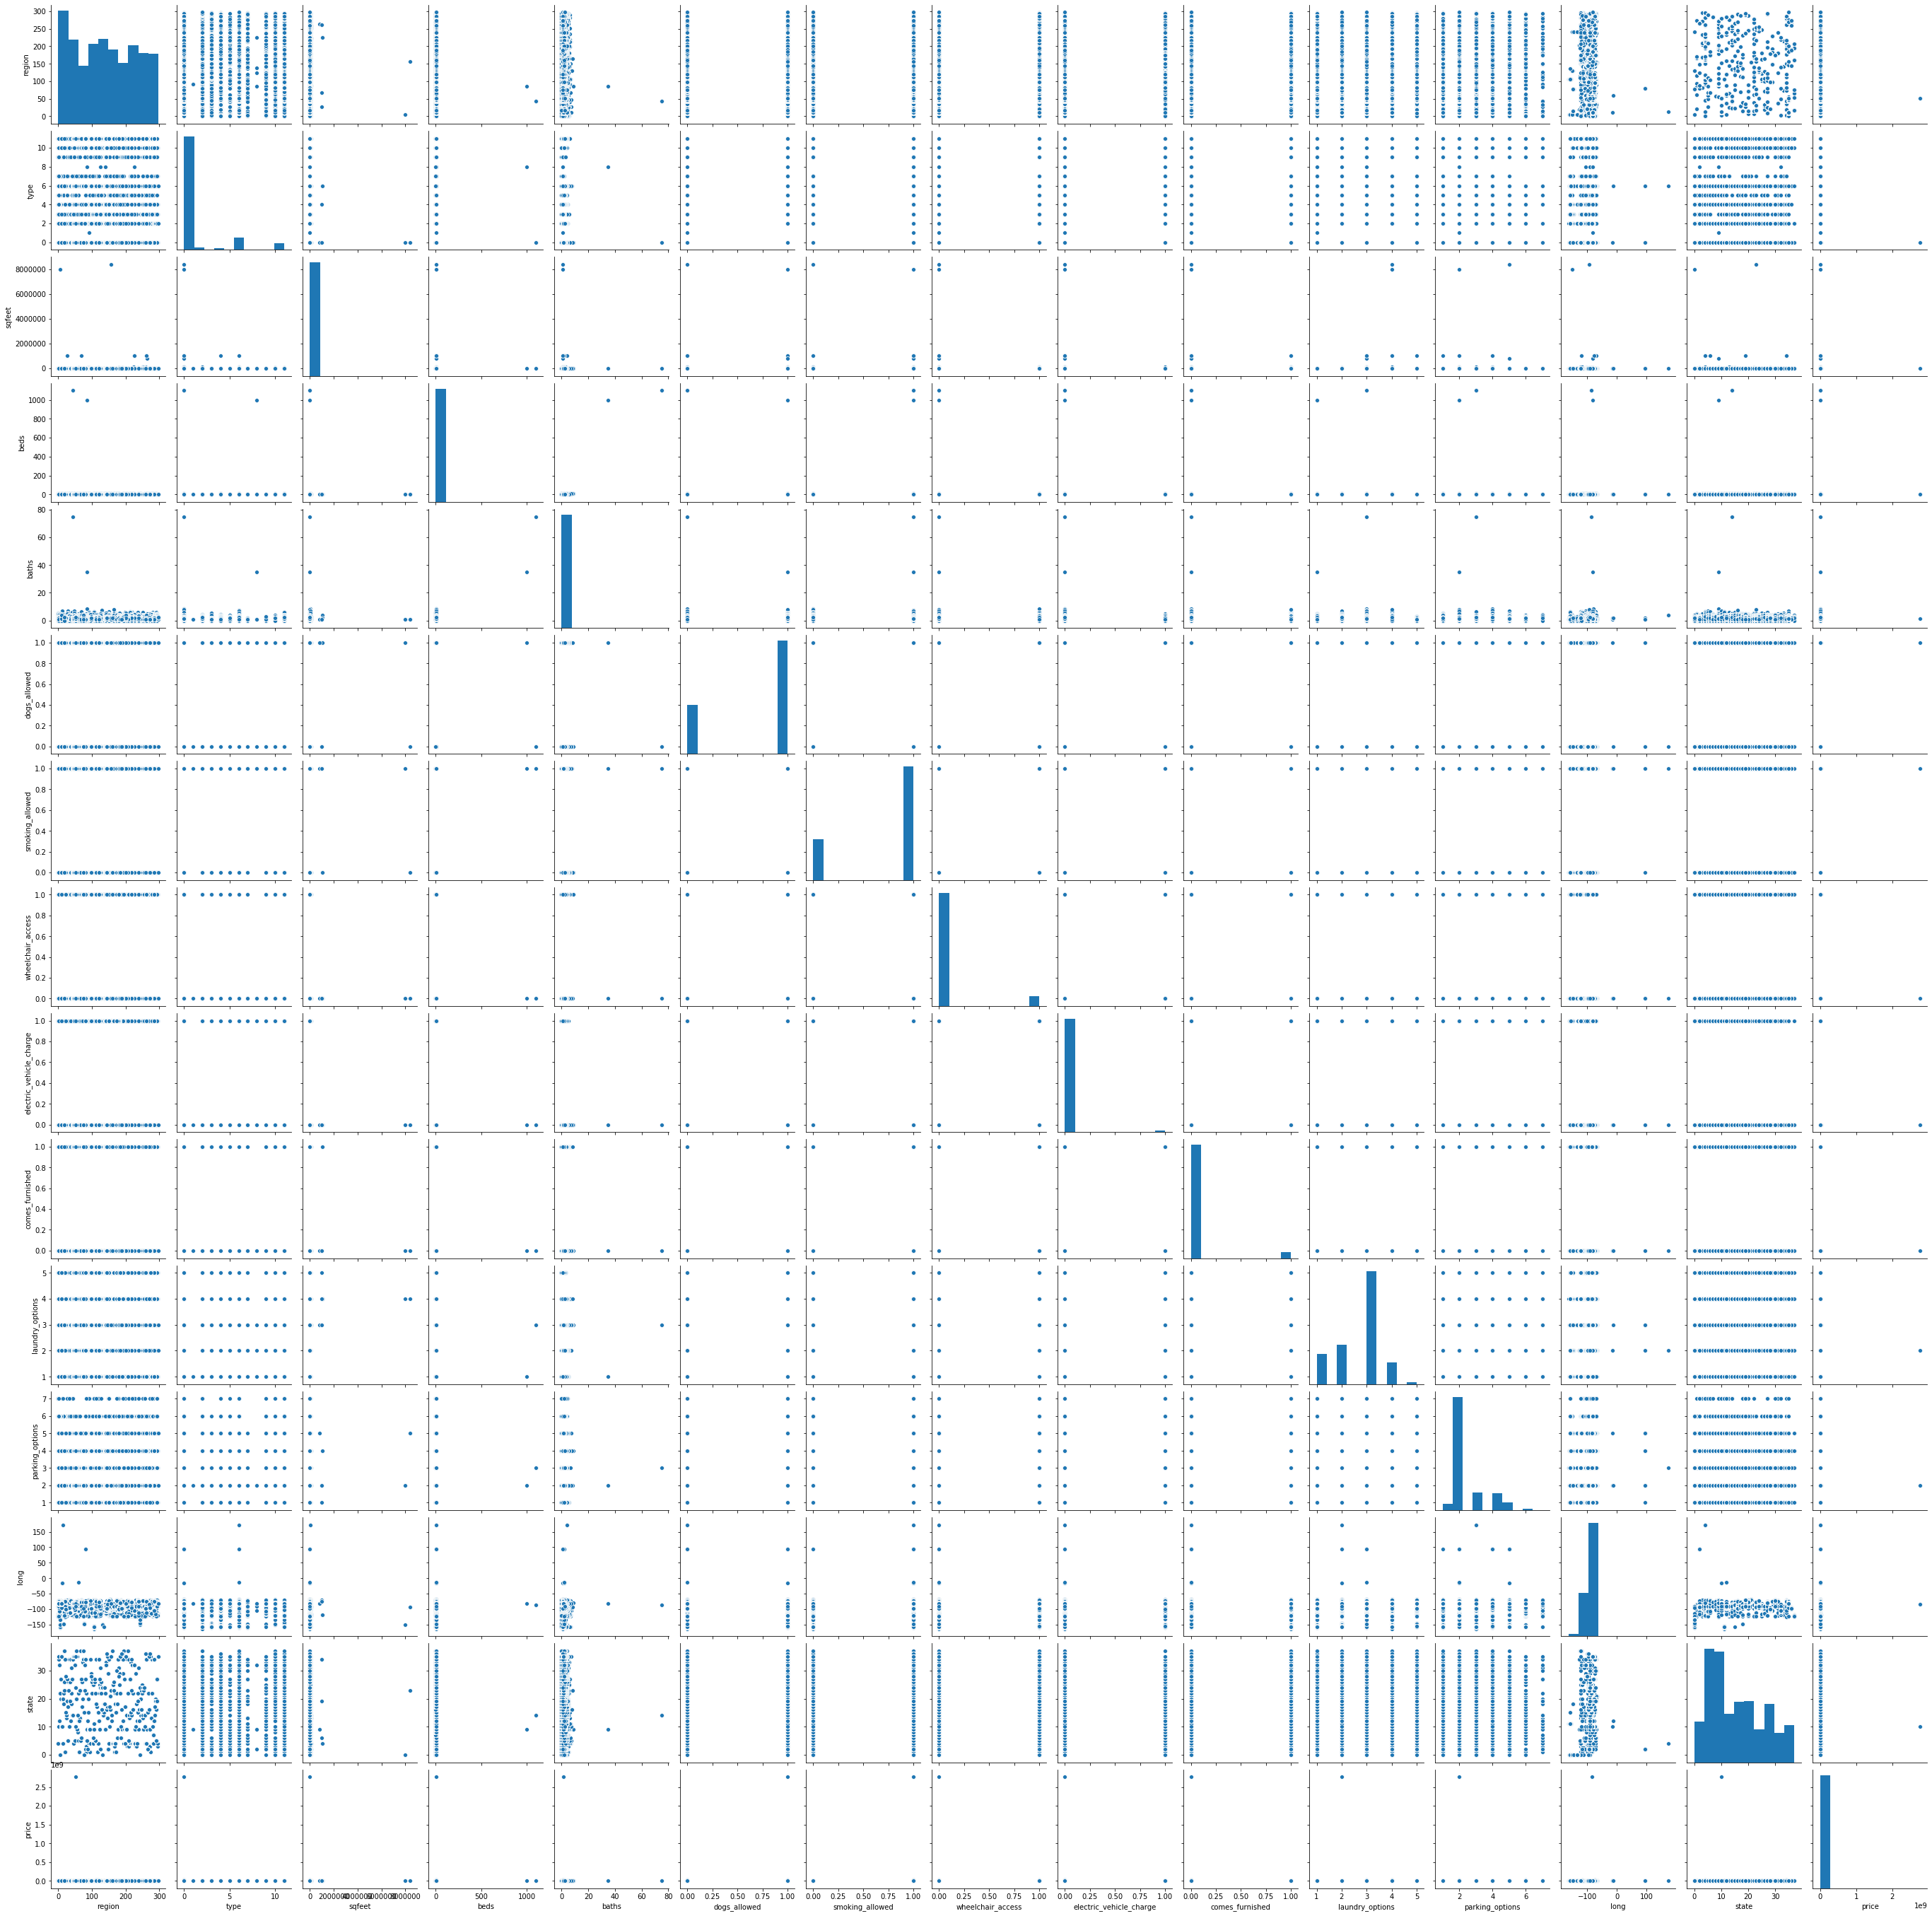

In [342]:
sns.pairplot(df2)

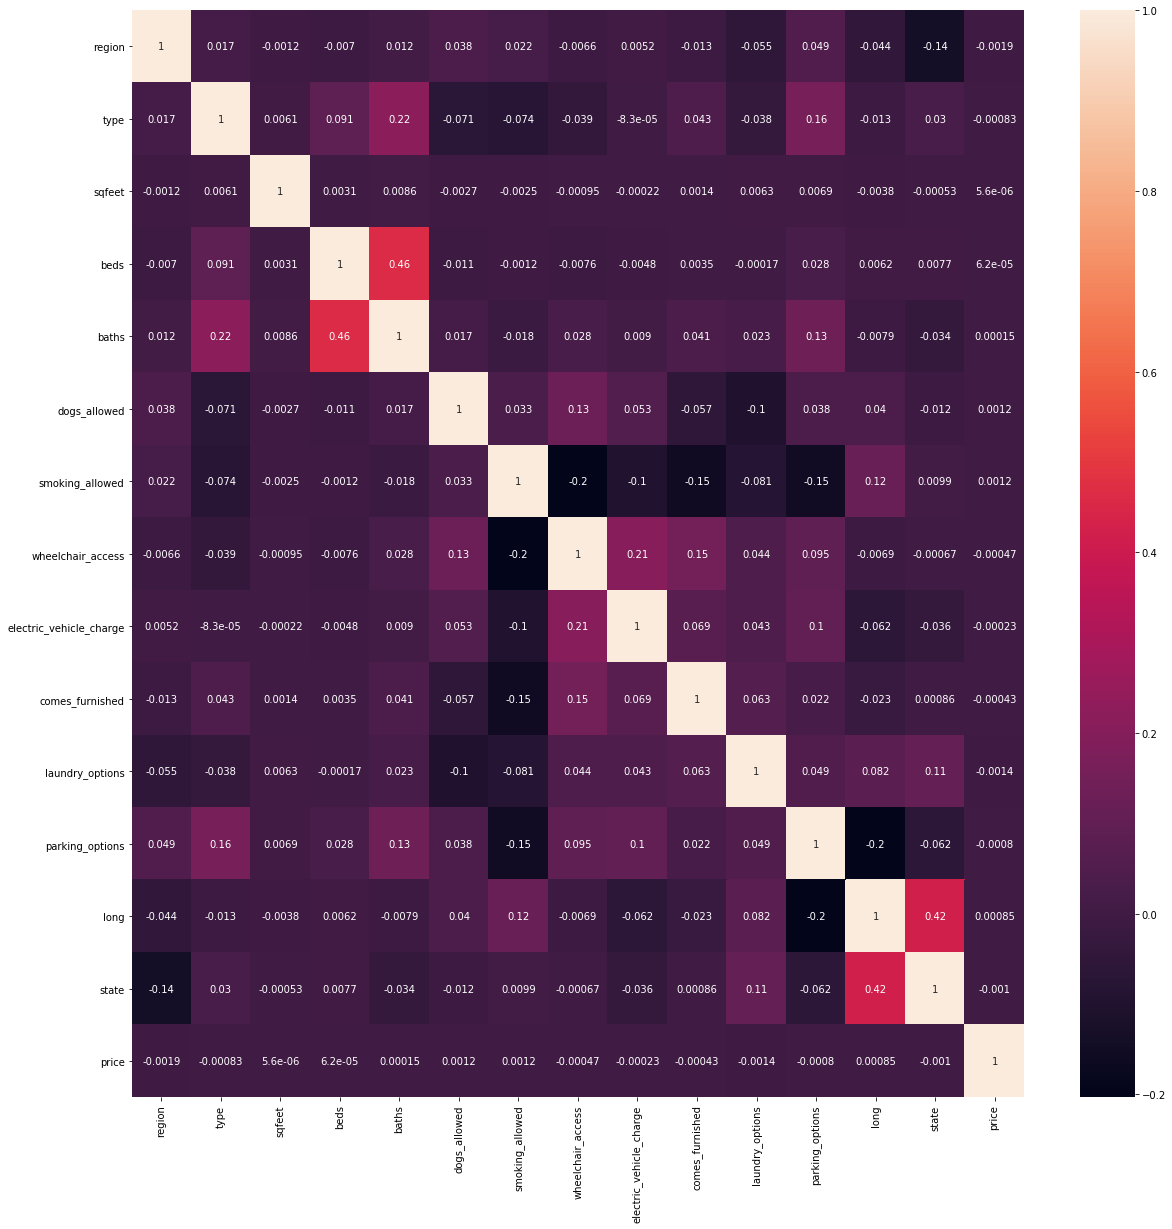

In [351]:
plt.figure(figsize=(20,20))
x=X.corr()
p=sns.heatmap(x,annot=True)

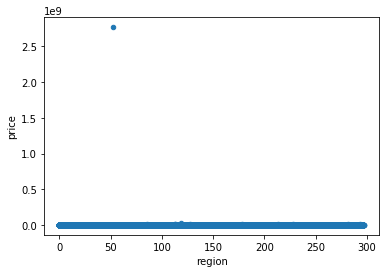

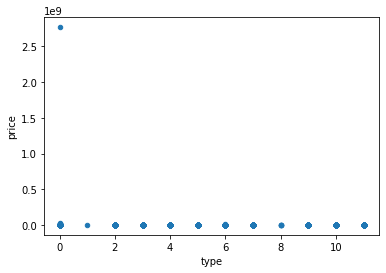

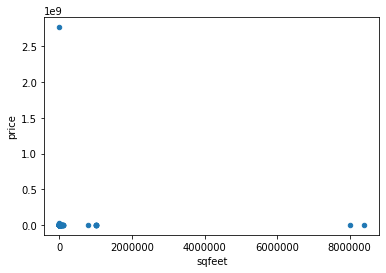

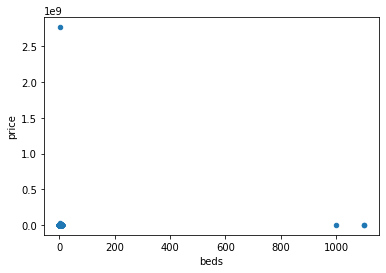

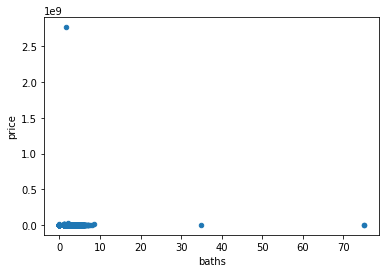

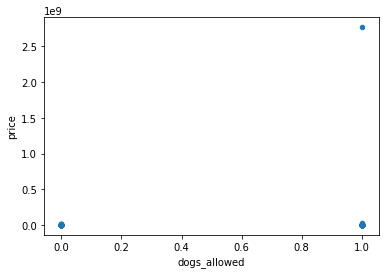

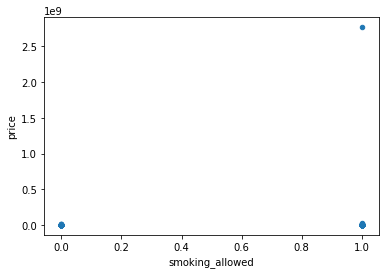

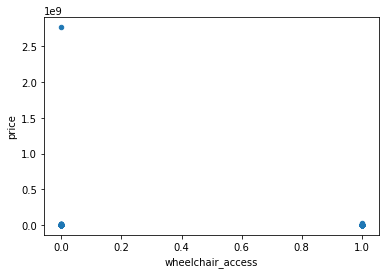

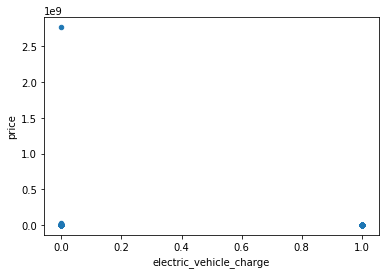

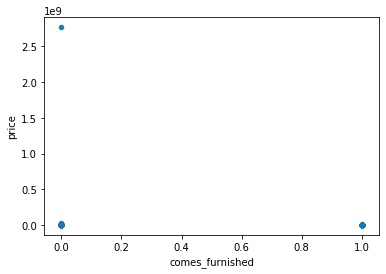

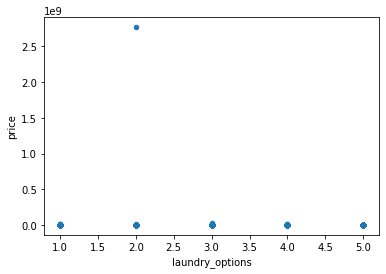

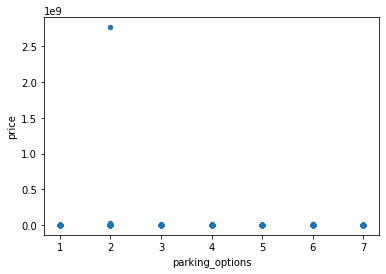

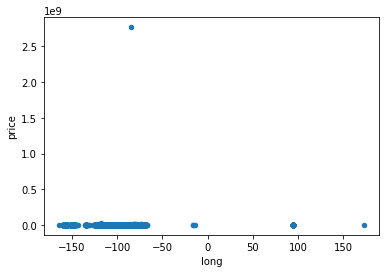

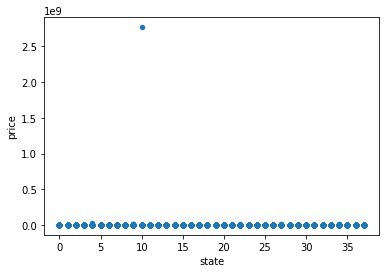

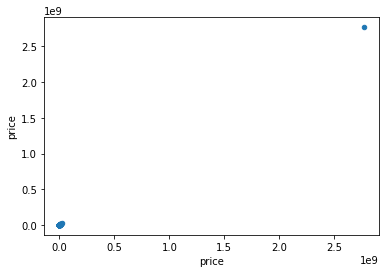

In [353]:
for i in df2 :
    df2.plot(i,"price",kind="scatter")

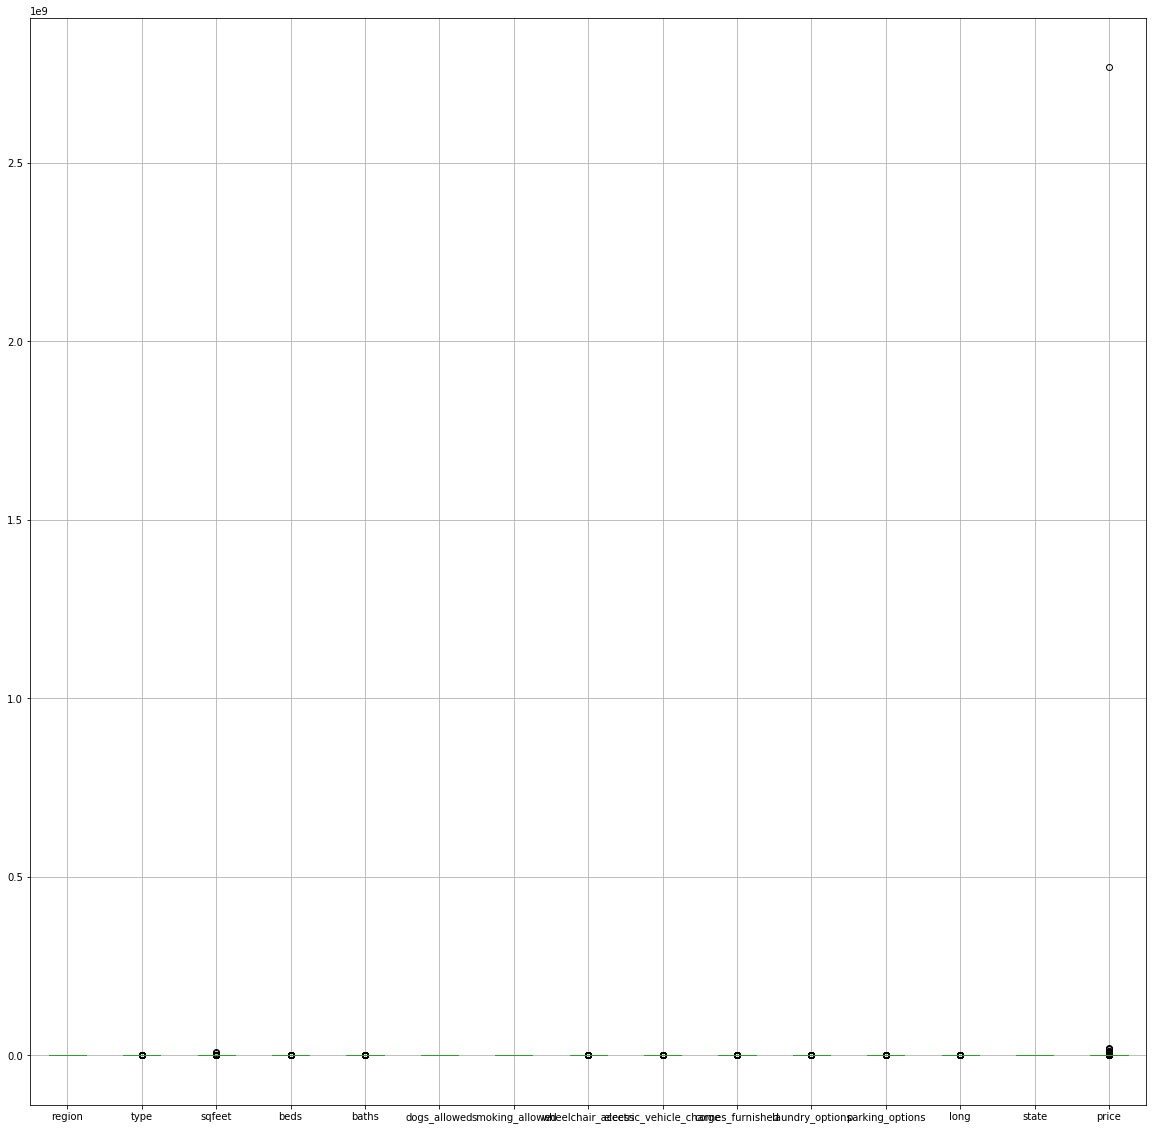

In [355]:
plt.figure(figsize=(20,20))
df2.boxplot()

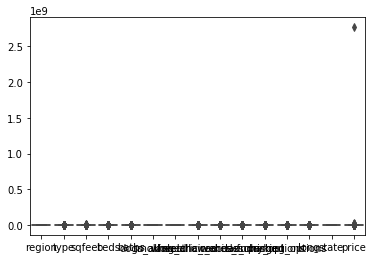

In [356]:
sns.boxplot(data=df2)

In [357]:
from sklearn import preprocessing 
Standardisation = preprocessing.StandardScaler() 
  
# Scaled feature 
X_after_Standardisation = Standardisation.fit_transform(X)

In [358]:
X_after_Standardisation

array([[-1.34034493e+00, -4.22038618e-01,  3.52996506e-02, ...,
         3.28537292e-01, -1.43506006e+00, -2.06048173e-03],
       [-1.34034493e+00, -4.22038618e-01,  9.76736542e-03, ...,
         3.22880469e-01, -1.43506006e+00, -2.07443174e-03],
       [-1.34034493e+00, -4.22038618e-01,  1.70453851e-03, ...,
         3.28537292e-01, -1.43506006e+00, -2.12930176e-03],
       ...,
       [-9.89865382e-01, -4.22038618e-01,  2.45492148e-02, ...,
         5.40079406e-01,  1.96121205e+00, -2.00244970e-03],
       [-9.89865382e-01, -4.22038618e-01,  5.47586078e-03, ...,
         5.73864496e-01,  1.96121205e+00, -2.09656575e-03],
       [-9.89865382e-01,  3.42822184e+00,  8.94374332e-03, ...,
         2.10732182e-12, -5.36046854e-01, -2.06624773e-03]])

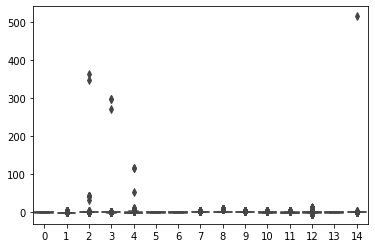

In [359]:
sns.boxplot(data=X_after_Standardisation)

In [364]:
dff=pd.DataFrame(X_after_Standardisation, columns=["region","type","sqfeet","beds","baths","dogs_allowed","smoking_allowed","wheelchair_access","electric_vehicle_charge","comes_furnished","laundry_options","parking_options","long","state","price"])

In [365]:
dff

,region,type,sqfeet,beds,baths,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,long,state,price
0,-1.340345,-0.422039,0.035300,0.294588,0.819622,0.660036,0.602155,-0.29239,-0.120701,-0.226123,-1.839855,-1.512102,3.285373e-01,-1.435060,-0.002060
1,-1.340345,-0.422039,0.009767,0.294588,0.819622,0.660036,0.602155,-0.29239,-0.120701,-0.226123,-1.839855,-0.471593,3.228805e-01,-1.435060,-0.002074
2,-1.340345,-0.422039,0.001705,-0.247140,0.026232,0.660036,0.602155,-0.29239,-0.120701,-0.226123,-1.839855,-1.512102,3.285373e-01,-1.435060,-0.002129
3,-1.340345,-0.422039,-0.007225,-0.247140,-0.767158,0.660036,0.602155,-0.29239,-0.120701,-0.226123,-1.839855,-1.512102,3.285373e-01,-1.435060,-0.002134
4,-1.340345,-0.422039,-0.002023,0.023724,-0.767158,0.660036,0.602155,-0.29239,-0.120701,-0.226123,-1.839855,-1.512102,3.285373e-01,-1.435060,-0.002137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,-0.989865,-0.422039,-0.001417,0.023724,0.819622,0.660036,0.602155,-0.29239,-0.120701,-0.226123,0.405097,2.649932,5.386248e-01,1.961212,-0.002283
265186,-0.989865,-0.422039,-0.003194,0.023724,0.026232,0.660036,0.602155,-0.29239,-0.120701,-0.226123,-0.717379,2.649932,5.378455e-01,1.961212,-0.002084
265187,-0.989865,-0.422039,0.024549,0.023724,0.026232,0.660036,0.602155,-0.29239,-0.120701,-0.226123,0.405097,-0.471593,5.400794e-01,1.961212,-0.002002
265188,-0.989865,-0.422039,0.005476,0.294588,0.026232,0.660036,0.602155,-0.29239,-0.120701,-0.226123,-0.717379,-0.471593,5.738645e-01,1.961212,-0.002097


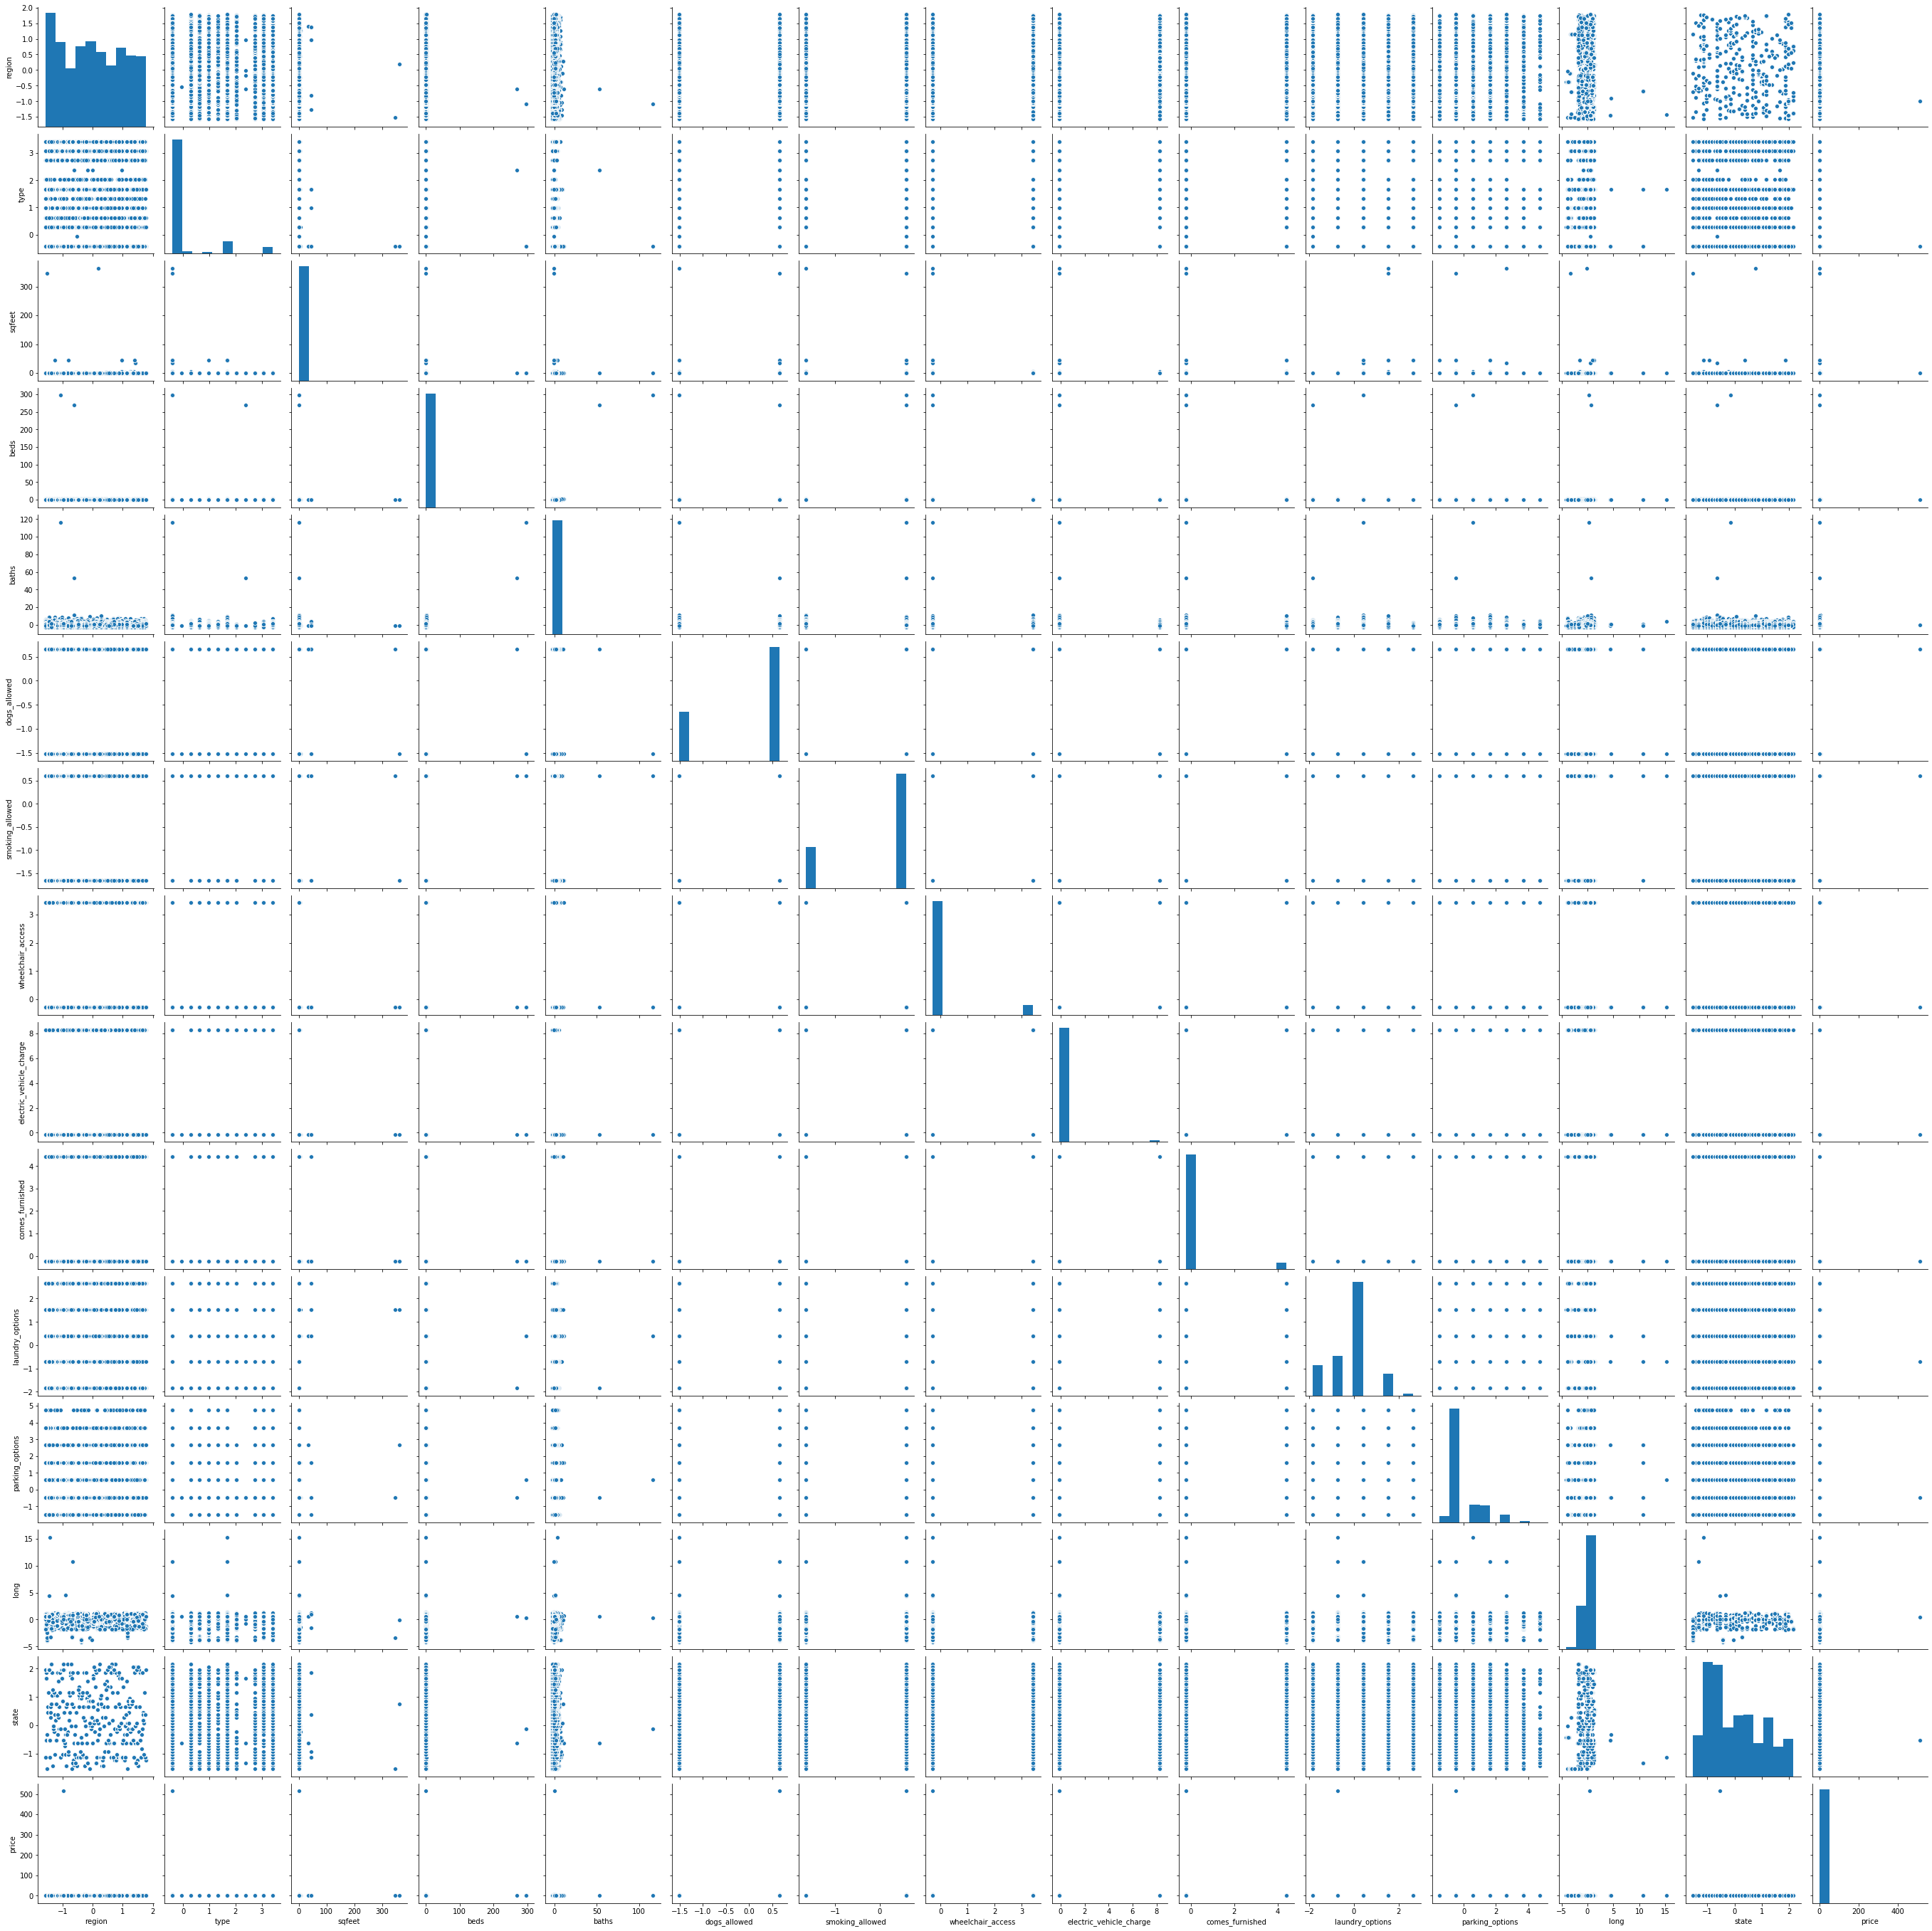

In [366]:
sns.pairplot(data=dff)

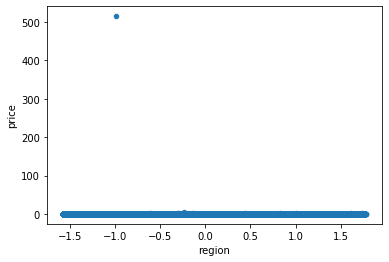

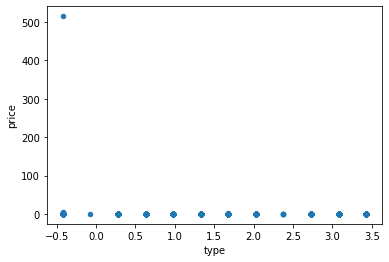

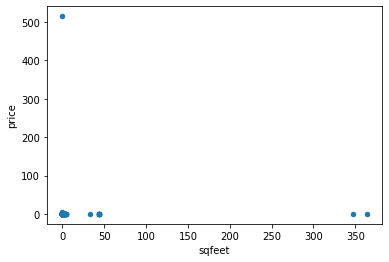

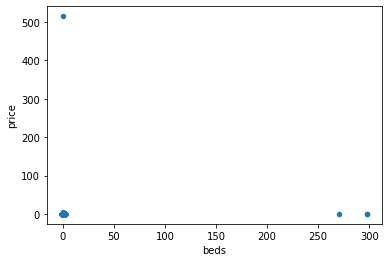

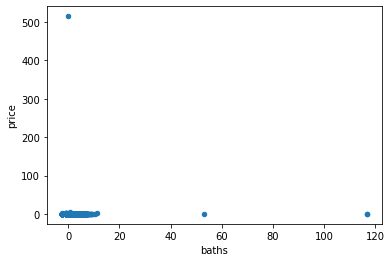

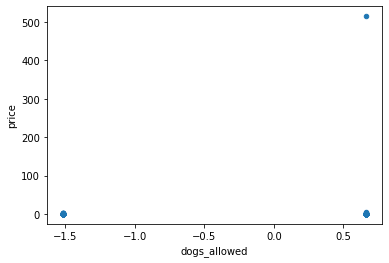

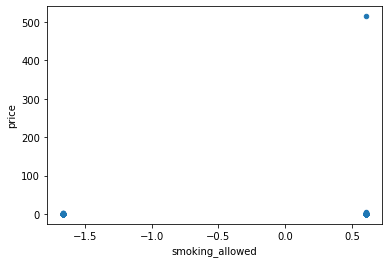

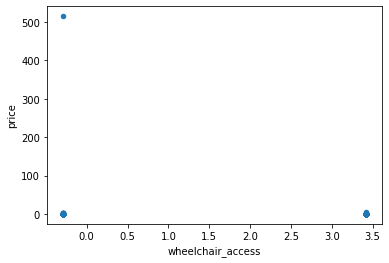

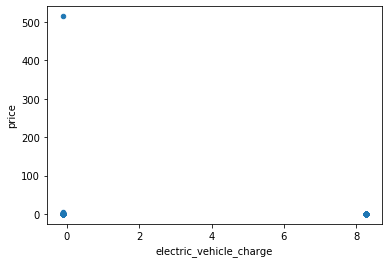

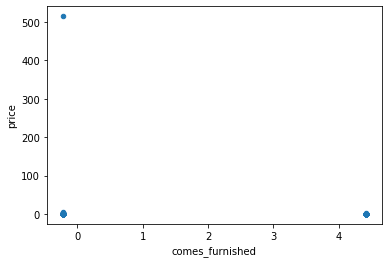

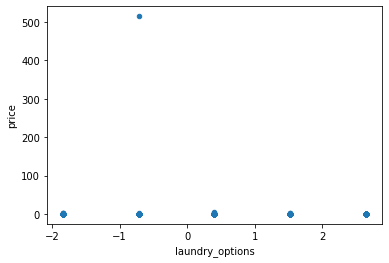

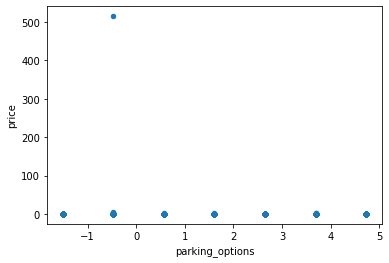

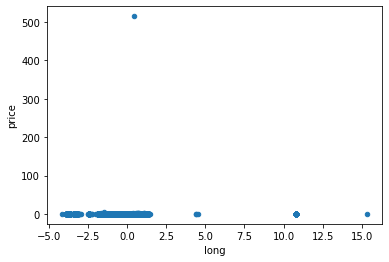

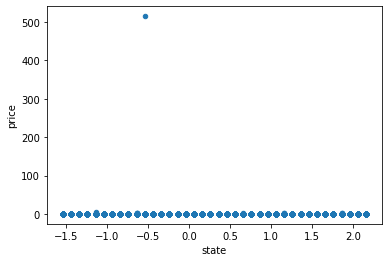

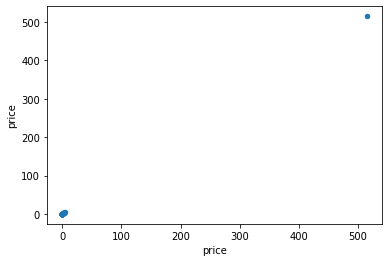

In [367]:
for i in dff :
    dff.plot(i,"price",kind="scatter")

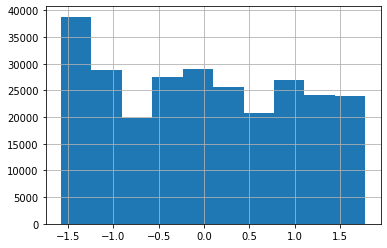

In [370]:
dff["region"].hist()

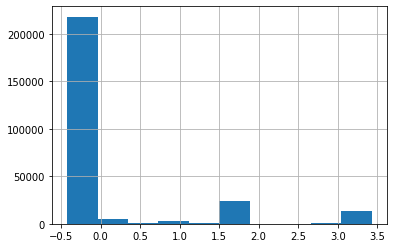

In [378]:

dff["type"].hist()


In [382]:
df2.head()

,region,type,sqfeet,beds,baths,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,long,state,price
0,21,0,1908,3,2.0,1,1,0,0,0,1,1,-86.7065,1,1195
1,21,0,1319,3,2.0,1,1,0,0,0,1,2,-86.8045,1,1120
2,21,0,1133,1,1.5,1,1,0,0,0,1,1,-86.7065,1,825
3,21,0,927,1,1.0,1,1,0,0,0,1,1,-86.7065,1,800
4,21,0,1047,2,1.0,1,1,0,0,0,1,1,-86.7065,1,785


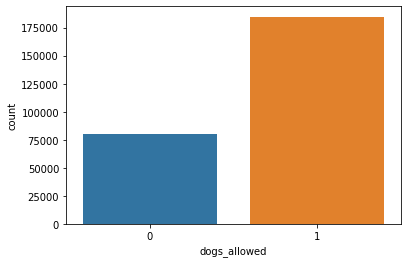

In [385]:
sns.countplot(x="dogs_allowed",data=df2)

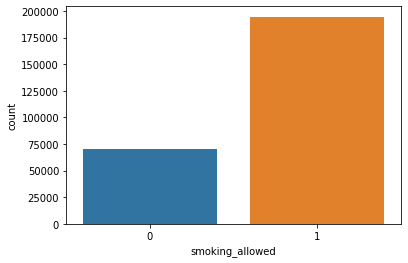

In [386]:
sns.countplot(x="smoking_allowed",data=df2)

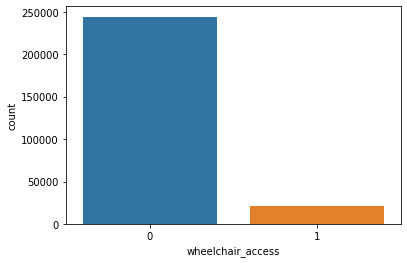

In [387]:
sns.countplot(x="wheelchair_access",data=df2)

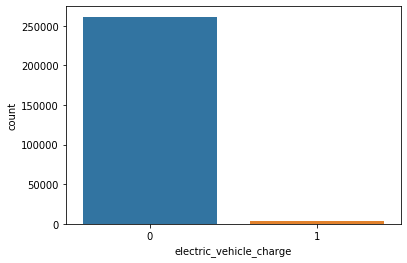

In [388]:
sns.countplot(x="electric_vehicle_charge",data=df2)

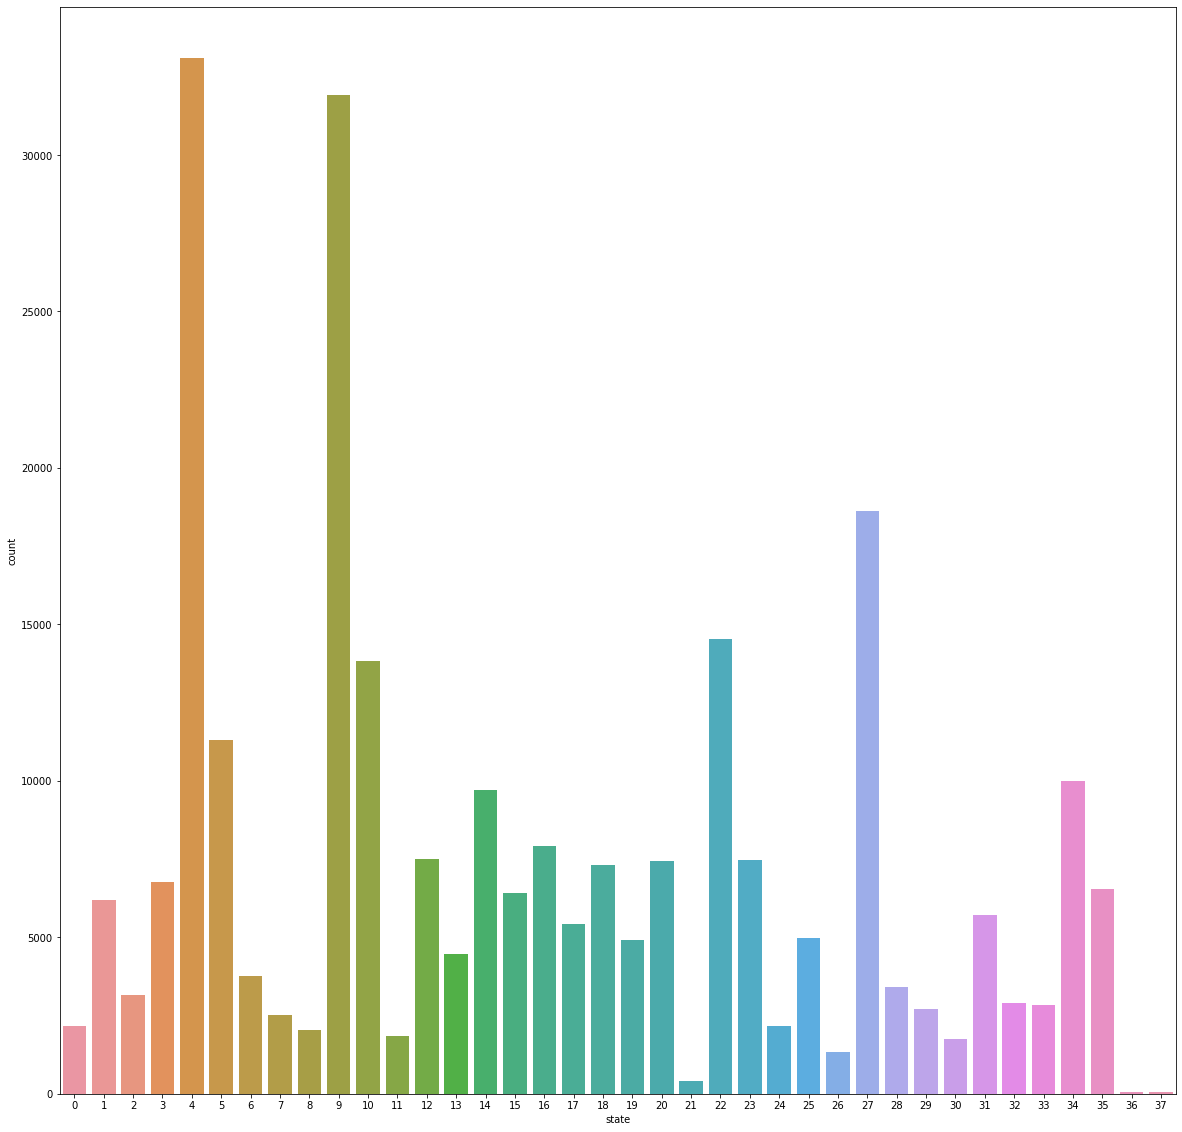

In [390]:
plt.figure(figsize=(20,20))
sns.countplot(x="state",data=df2)

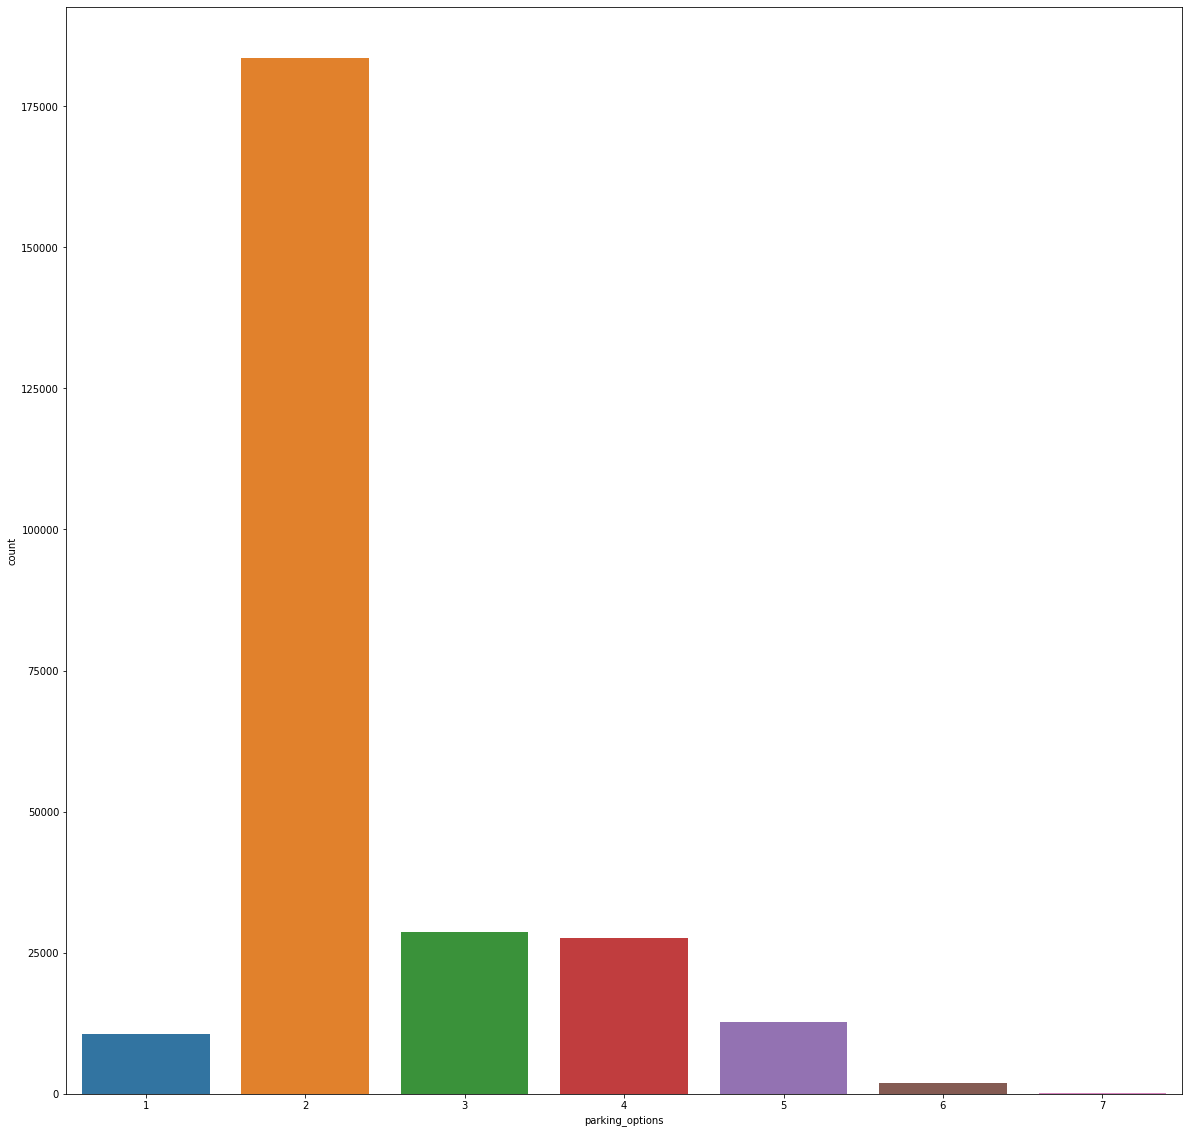

In [391]:
plt.figure(figsize=(20,20))
sns.countplot(x="parking_options",data=df2)